## Import modules and data

In [1]:
# https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../data/HAL.csv')
df.head()

,Date,Close
0,7/2/2018,44.470001
1,7/3/2018,44.529999
2,7/5/2018,44.450001
3,7/6/2018,44.930000
4,7/9/2018,45.830002


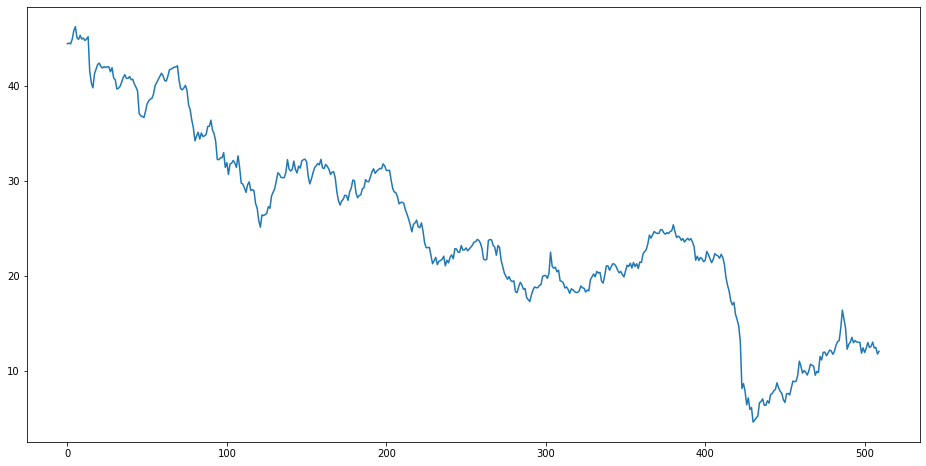

In [3]:
# What historical stock prices actually looked like
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [4]:
model_data = df.iloc[0:370,:]
model_data.head()

,Date,Close
0,2018-07-02,44.470001
1,2018-07-03,44.529999
2,2018-07-05,44.450001
3,2018-07-06,44.930000
4,2018-07-09,45.830002


## Create and train the model

In [5]:
# Use train, test, split to training and testing data
from sklearn.model_selection import train_test_split

input_data = []
output_data = []

for i in range(60,len(model_data)):
    input_data.append(model_data.loc[i-60:i,"Close"])
    output_data.append(model_data.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [7]:
# Reshape training data to fit model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [8]:
# Fit the model
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(X_train_scaled,y_train_scaled,epochs=5,batch_size=32,verbose=2)

Epoch 1/5
8/8 - 1s - loss: 0.0971
Epoch 2/5
8/8 - 1s - loss: 0.0178
Epoch 3/5
8/8 - 1s - loss: 0.0112
Epoch 4/5
8/8 - 1s - loss: 0.0065
Epoch 5/5
8/8 - 1s - loss: 0.0048


## Test the model

In [9]:
# Reshape testing data to fit model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [10]:
# Evaluate the model using the testing data
model_loss = lstm_model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}")

3/3 - 0s - loss: 0.0056
Loss: 0.005595094989985228


In [11]:
# Predict y values for test data to see how closely they match actual values
predicted_closing_price=lstm_model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[20.831226],
       [37.661312],
       [28.837587],
       [28.14923 ],
       [34.400883],
       [27.228403],
       [29.841015],
       [21.861534],
       [19.932892],
       [30.635387],
       [27.38589 ],
       [25.309174],
       [20.95791 ],
       [22.097572],
       [20.74515 ],
       [20.817053],
       [37.08504 ],
       [27.15118 ],
       [25.12684 ],
       [24.21995 ],
       [26.908646],
       [29.839832],
       [28.890472],
       [22.754366],
       [27.61283 ],
       [22.903494],
       [28.72477 ],
       [33.19144 ],
       [19.883278],
       [20.560162],
       [29.722267],
       [36.785675],
       [28.910553],
       [19.716919],
       [29.791656],
       [29.771364],
       [30.767345],
       [37.197018],
       [22.682337],
       [27.767643],
       [31.285118],
       [34.735584],
       [21.979364],
       [19.591303],
       [21.030539],
       [22.600428],
       [20.08497 ],
       [37.384243],
       [20.832457],
       [27.836033],


In [12]:
predictions = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [13]:
test_data = pd.DataFrame({"Predicted": predictions})
test_data

,Predicted
0,20.831226
1,37.661312
2,28.837587
3,28.149229
4,34.400883
...,...
73,33.396713
74,35.489872
75,19.442282
76,29.012138


In [14]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[19.9     ],
       [42.139999],
       [28.98    ],
       [25.85    ],
       [34.68    ],
       [26.360001],
       [29.700001],
       [22.84    ],
       [21.030001],
       [31.43    ],
       [30.35    ],
       [24.74    ],
       [20.99    ],
       [24.35    ],
       [20.620001],
       [20.530001],
       [41.799999],
       [25.360001],
       [23.51    ],
       [22.17    ],
       [30.700001],
       [31.25    ],
       [31.290001],
       [23.790001],
       [30.360001],
       [21.549999],
       [28.09    ],
       [34.16    ],
       [19.440001],
       [19.27    ],
       [30.290001],
       [41.049999],
       [32.099998],
       [18.25    ],
       [30.200001],
       [31.32    ],
       [31.889999],
       [37.540001],
       [23.85    ],
       [30.1     ],
       [31.799999],
       [35.060001],
       [21.379999],
       [20.27    ],
       [20.790001],
       [23.6     ],
       [18.6     ],
       [42.      ],
       [20.48    ],
       [30.9     ],


In [15]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
test_data["Actual"] = actuals
test_data

,Predicted,Actual
0,20.831226,19.900000
1,37.661312,42.139999
2,28.837587,28.980000
3,28.149229,25.850000
4,34.400883,34.680000
...,...,...
73,33.396713,36.410000
74,35.489872,35.139999
75,19.442282,18.950001
76,29.012138,29.090000


In [16]:
lstm_model.save("../models/HAL_model.h5")

## Use the model to predict stock prices 

In [17]:
inputs = []

for i in range(370,len(df)):
    inputs.append(df.loc[i-60:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [18]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [19]:
forecasted_closing_price = lstm_model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[22.757559 ],
       [22.95396  ],
       [23.14143  ],
       [23.315758 ],
       [23.466257 ],
       [23.589785 ],
       [23.69344  ],
       [23.776064 ],
       [23.845724 ],
       [23.9067   ],
       [23.976215 ],
       [24.03283  ],
       [24.061932 ],
       [24.071394 ],
       [24.063526 ],
       [24.033546 ],
       [23.993114 ],
       [23.937778 ],
       [23.879015 ],
       [23.823675 ],
       [23.768915 ],
       [23.720823 ],
       [23.671597 ],
       [23.60973  ],
       [23.502947 ],
       [23.374382 ],
       [23.221445 ],
       [23.063637 ],
       [22.904068 ],
       [22.742952 ],
       [22.589378 ],
       [22.470182 ],
       [22.37394  ],
       [22.28785  ],
       [22.201674 ],
       [22.124784 ],
       [22.071518 ],
       [22.035318 ],
       [22.011475 ],
       [21.991795 ],
       [21.984644 ],
       [21.978045 ],
       [21.955242 ],
       [21.884024 ],
       [21.75581  ],
       [21.570436 ],
       [21.322426 ],
       [21.02

In [20]:
forecasts = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [21]:
forecast_data = df.iloc[370:,:]
forecast_data

,Date,Close
370,2019-12-19,24.480000
371,2019-12-20,24.490000
372,2019-12-23,24.889999
373,2019-12-24,24.860001
374,2019-12-26,24.540001
...,...,...
505,2020-07-06,13.030000
506,2020-07-07,12.410000
507,2020-07-08,12.470000
508,2020-07-09,11.780000


In [22]:
forecast_data["Prediction"] = forecasts
forecast_data

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
370,2019-12-19,24.480000,22.757559
371,2019-12-20,24.490000,22.953960
372,2019-12-23,24.889999,23.141430
373,2019-12-24,24.860001,23.315758
374,2019-12-26,24.540001,23.466257
...,...,...,...
505,2020-07-06,13.030000,14.858051
506,2020-07-07,12.410000,14.832623
507,2020-07-08,12.470000,14.809397
508,2020-07-09,11.780000,14.773491


In [23]:
forecast_data.to_csv("../data/predictions/HAL.csv")

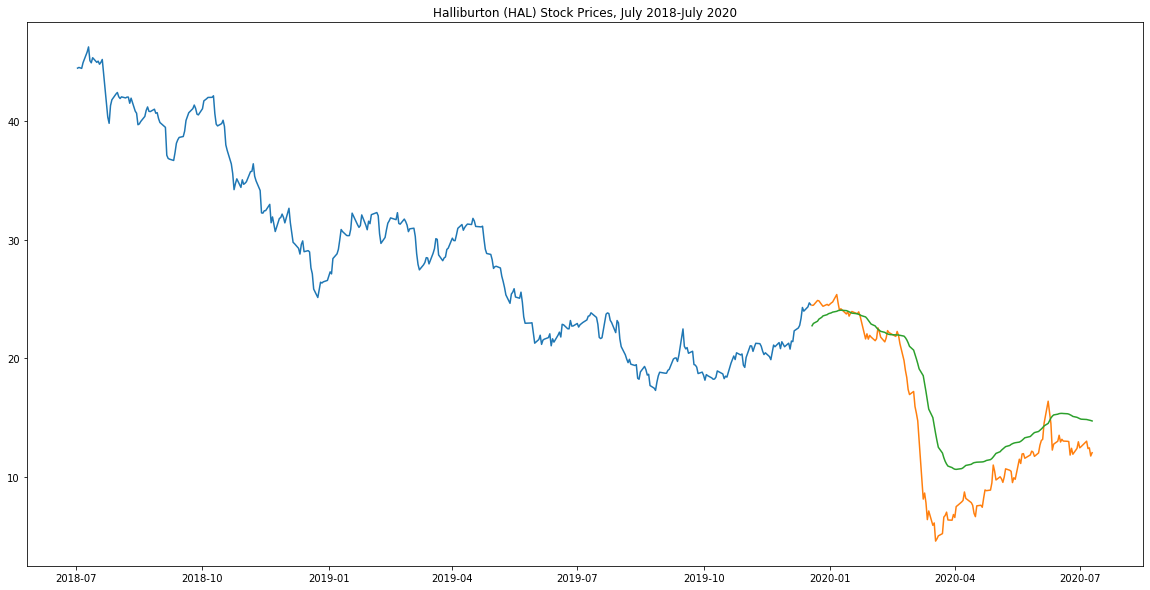

In [23]:
model_data = model_data.set_index("Date")
forecast_data = forecast_data.set_index("Date")
plt.plot(model_data["Close"])
plt.plot(forecast_data[['Close',"Prediction"]])
plt.title("Halliburton (HAL) Stock Prices, July 2018-July 2020")
plt.savefig("../charts/HAL.png")